In [1]:
# libraries needed
import pandas as pd
from plotnine import ggplot, geom_point, aes, geom_bin2d, scale_x_log10, scale_x_continuous, scale_y_continuous, labs, theme_minimal, scale_fill_gradientn
from matplotlib.cm import inferno
from matplotlib.colors import to_hex

In [2]:
# READING FILES
# please change reading path accordingly

# read the main title table (reduced and cleaned)
title_basics = pd.read_csv("data/small_title_basics.csv")
title_basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,NaN,NaN,"Action,Crime"
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118.0,"Comedy,Fantasy,Romance"
2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,NaN,70.0,Drama
3,tt0067758,movie,"Simón, contamos contigo","Simón, contamos contigo",0,2015,NaN,81.0,"Comedy,Drama"
4,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122.0,Drama


In [3]:
# read the ratings table
title_ratings = pd.read_csv("data/title.ratings.tsv", sep = '\t')
title_ratings.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,2102
1,tt0000002,5.6,282
2,tt0000003,6.5,2121
3,tt0000004,5.4,182
4,tt0000005,6.2,2852


In [4]:
# read the principals table (containing data about actors, reduced and cleaned version)
title_principals = pd.read_csv("data/small_title_principals.csv")
title_principals.head()

,tconst,ordering,nconst,category,primaryName,birthYear
0,tt0000005,1,nm0443482,actor,Charles Kayser,1878.0
1,tt0000007,1,nm0179163,actor,James J. Corbett,1866.0
2,tt0000008,1,nm0653028,actor,NaN,NaN
3,tt0000009,1,nm0063086,actress,Blanche Bayliss,1878.0
4,tt0000011,1,nm3692297,actor,NaN,NaN


In [5]:
# PROCESSING OBJECTS
# add ratings to title_basics (join the tables)
title_basics_ratings = title_basics.merge( title_ratings, on = "tconst", how = "left")
title_basics_ratings.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0011801,movie,Tötet nicht mehr,Tötet nicht mehr,0,2019,NaN,NaN,"Action,Crime",NaN,NaN
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118.0,"Comedy,Fantasy,Romance",6.4,90594.0
2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,NaN,70.0,Drama,6.5,194.0
3,tt0067758,movie,"Simón, contamos contigo","Simón, contamos contigo",0,2015,NaN,81.0,"Comedy,Drama",4.2,47.0
4,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122.0,Drama,6.7,8186.0


In [6]:
# keep only shorter movies with at least 10 votes
#df_movies = filter(title_basics_ratings, runtimeMinutes < 180, numVotes >= 10)
df_movies = title_basics_ratings.query( "runtimeMinutes < 180 and numVotes >= 10" )
print( df_movies.shape )
df_movies.head()

(152959, 11)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
1,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,NaN,118.0,"Comedy,Fantasy,Romance",6.4,90594.0
2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,NaN,70.0,Drama,6.5,194.0
3,tt0067758,movie,"Simón, contamos contigo","Simón, contamos contigo",0,2015,NaN,81.0,"Comedy,Drama",4.2,47.0
4,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,NaN,122.0,Drama,6.7,8186.0
5,tt0070596,movie,Socialist Realism,El realismo socialista,0,2023,NaN,78.0,Drama,7.4,74.0


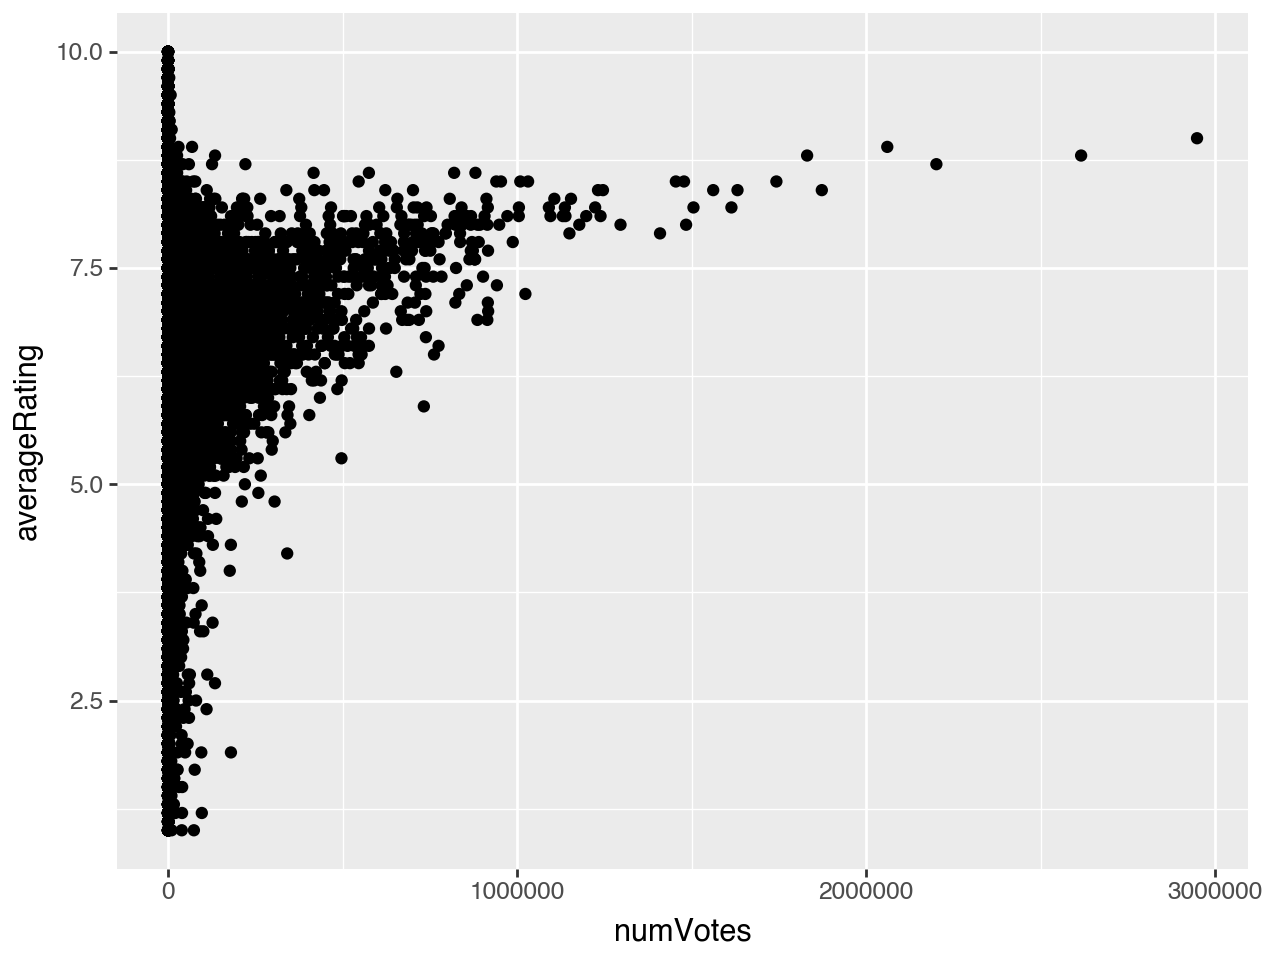

In [7]:
# PLOTTING FILES
# Let's see the ratings vs number of votes distribution
(
    ggplot( df_movies, aes( x = "numVotes", y = "averageRating" )) 
    + geom_point()

)

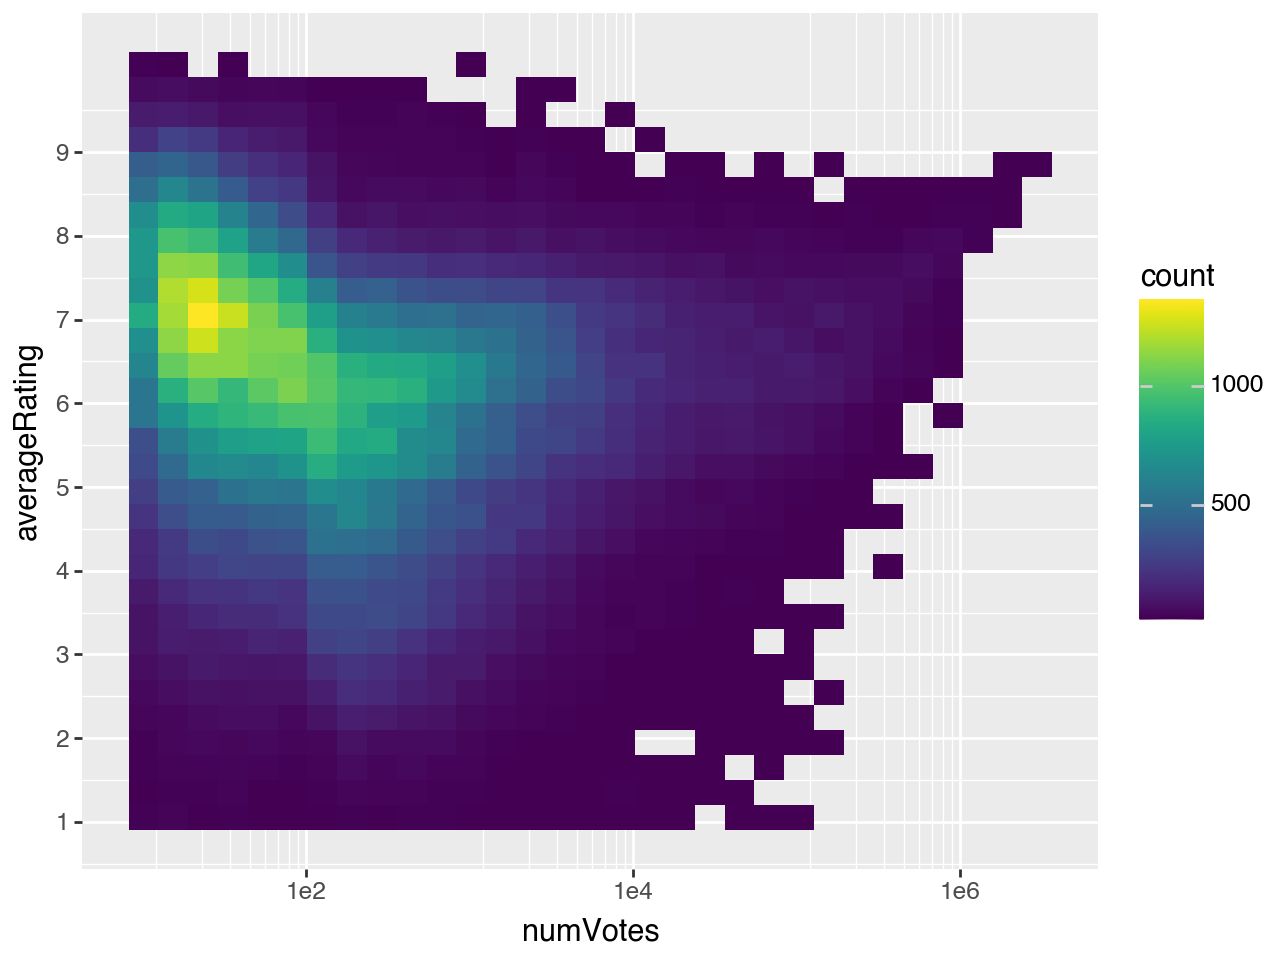

In [8]:
# it's better to look at it with a heatmap on log10 scale
(
    ggplot( df_movies, aes(x = "numVotes", y = "averageRating" )) 
    + geom_bin2d() 
    + scale_x_log10() 
    + scale_y_continuous( breaks = range( 10 ) )
)

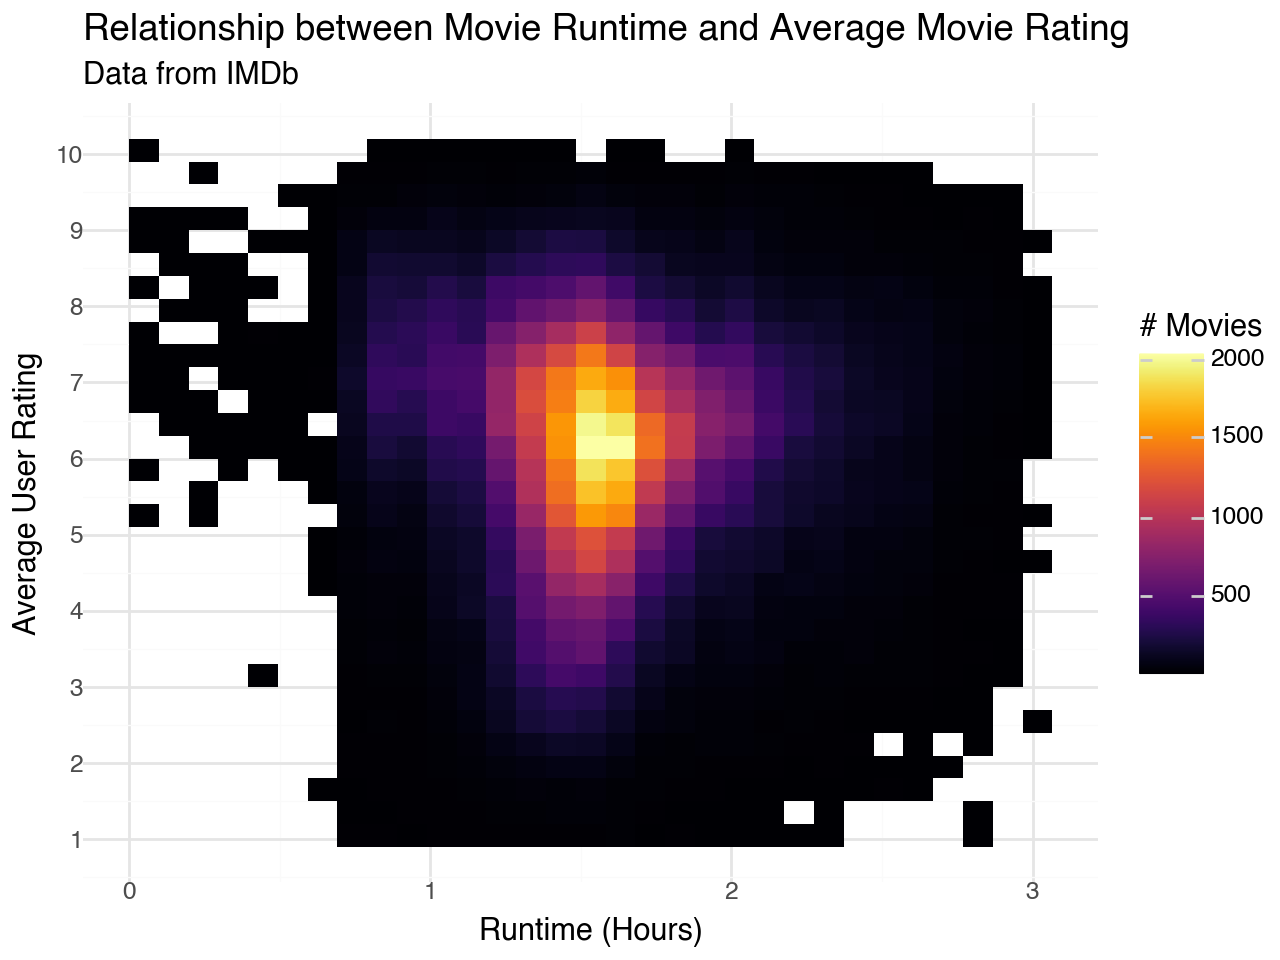

In [9]:
# what about the rating as a function of the lenght of the movie?
inferno_colors = [ to_hex(c) for c in inferno(range(256) ) ]
(
    ggplot(df_movies, aes(x='runtimeMinutes', y='averageRating')) +
    geom_bin2d(bins=30) 
    + scale_x_continuous( breaks=[0, 60, 120, 180], labels=["0", "1", "2", "3"] ) 
    + scale_y_continuous( breaks=range(0, 11) ) 
    + theme_minimal()
    + labs(
        title="Relationship between Movie Runtime and Average Movie Rating",
        subtitle="Data from IMDb",
        x="Runtime (Hours)",
        y="Average User Rating",
        fill="# Movies"
    )
    + scale_fill_gradientn( colors = inferno_colors )
)